<a href="https://colab.research.google.com/github/csd-oss/vc-investmemt/blob/iss4/VC_Investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General preparation and GDrive conection

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt

# Uploiding info from [OECD](https://stats.oecd.org/Index.aspx?DataSetCode=VC_INVEST#)

In [3]:
vc_path = "https://raw.githubusercontent.com/csd-oss/vc-investmemt/master/VC_INVEST_06042020205501847.csv"
df = pd.read_csv(vc_path)
df

,LOCATION,Country,SUBJECT,Subject,STAGES,Development stages,MEASURE,Measure,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,VC_INV,Venture capital investments,VC_T,Total,USD_V,"USD, current prices",2006,2006,USD,US Dollar,6,Millions,NaN,NaN,456.334579,NaN,NaN
1,AUS,Australia,VC_INV,Venture capital investments,VC_T,Total,USD_V,"USD, current prices",2007,2007,USD,US Dollar,6,Millions,NaN,NaN,680.293170,NaN,NaN
2,AUS,Australia,VC_INV,Venture capital investments,VC_T,Total,USD_V,"USD, current prices",2008,2008,USD,US Dollar,6,Millions,NaN,NaN,755.759626,NaN,NaN
3,AUS,Australia,VC_INV,Venture capital investments,VC_T,Total,USD_V,"USD, current prices",2009,2009,USD,US Dollar,6,Millions,NaN,NaN,532.682779,NaN,NaN
4,AUS,Australia,VC_INV,Venture capital investments,VC_T,Total,USD_V,"USD, current prices",2010,2010,USD,US Dollar,6,Millions,NaN,NaN,367.836251,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,ZAF,South Africa,VC_INV,Venture capital investments,VC_T,Total,SH_GDP,Percentage share of GDP,2013,2013,PC,Percentage,0,Units,NaN,NaN,0.043910,NaN,NaN
2774,ZAF,South Africa,VC_INV,Venture capital investments,VC_T,Total,SH_GDP,Percentage share of GDP,2014,2014,PC,Percentage,0,Units,NaN,NaN,0.068672,NaN,NaN
2775,ZAF,South Africa,VC_INV,Venture capital investments,VC_T,Total,SH_GDP,Percentage share of GDP,2015,2015,PC,Percentage,0,Units,NaN,NaN,0.027779,NaN,NaN
2776,ZAF,South Africa,VC_INV,Venture capital investments,VC_T,Total,SH_GDP,Percentage share of GDP,2016,2016,PC,Percentage,0,Units,NaN,NaN,0.043736,NaN,NaN


## Droping all not needed info

In [4]:
df = df.drop(columns=["Reference Period Code","Reference Period","Flag Codes","Flags","SUBJECT","Measure","Unit","Year","Subject","SUBJECT","Development stages"])
df

,LOCATION,Country,STAGES,MEASURE,TIME,Unit Code,PowerCode Code,PowerCode,Value
0,AUS,Australia,VC_T,USD_V,2006,USD,6,Millions,456.334579
1,AUS,Australia,VC_T,USD_V,2007,USD,6,Millions,680.293170
2,AUS,Australia,VC_T,USD_V,2008,USD,6,Millions,755.759626
3,AUS,Australia,VC_T,USD_V,2009,USD,6,Millions,532.682779
4,AUS,Australia,VC_T,USD_V,2010,USD,6,Millions,367.836251
...,...,...,...,...,...,...,...,...,...
2773,ZAF,South Africa,VC_T,SH_GDP,2013,PC,0,Units,0.043910
2774,ZAF,South Africa,VC_T,SH_GDP,2014,PC,0,Units,0.068672
2775,ZAF,South Africa,VC_T,SH_GDP,2015,PC,0,Units,0.027779
2776,ZAF,South Africa,VC_T,SH_GDP,2016,PC,0,Units,0.043736


## Deviding data into 2 dataframes

In [0]:
df_usd = df.query('MEASURE == "USD_V"')
df_gdp = df.query('MEASURE == "SH_GDP"')

# Playing with USD data

## Creating filters

In [0]:
filt_total_us = (df_usd['STAGES'] == "VC_T") & (df['LOCATION']== "USA")
filt_seed_us = (df_usd['STAGES'] == "SEED") & (df['LOCATION']== "USA")
filt_start_us = (df_usd['STAGES'] == "START") & (df['LOCATION']== "USA")
filt_later_us = (df_usd['STAGES'] == "LATER") & (df['LOCATION']== "USA")

## Ploting US VC data 

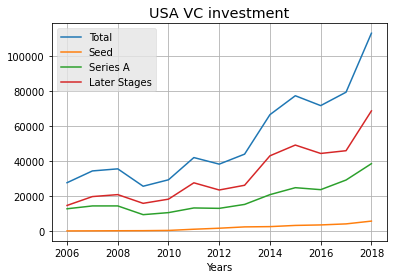

In [7]:
fig, ax = plt.subplots()
plt.style.use("ggplot")
ax.plot(df_usd.loc[filt_total_us].TIME, df_usd.loc[filt_total_us].Value, label = "Total")
ax.plot(df_usd.loc[filt_seed_us].TIME, df_usd.loc[filt_seed_us].Value, label = "Seed")
ax.plot(df_usd.loc[filt_start_us].TIME, df_usd.loc[filt_start_us].Value, label = "Series A")
ax.plot(df_usd.loc[filt_later_us].TIME, df_usd.loc[filt_later_us].Value, label = "Later Stages")

ax.set_xlabel("Years")
ax.set_label("Millions US$")
ax.set_title("USA VC investment")
ax.grid(True)
ax.legend()
plt.show()

# Countries Yearly Sum

In [7]:
filt_total = (df_usd['STAGES'] == "VC_T") & (df_usd['TIME'] >= 2007) #not enoght data till 2007
df_usd[filt_total].groupby(['TIME'])['Value'].sum().plot().   
plt.title('Total investment')
plt.ylabel('Millions USD')
plt.show()

SyntaxError: ignored

# 2018 Piechart creation

In [20]:
filt_total_2018 = (df_usd['TIME']==2018)&(df_usd['STAGES']=='VC_T') 
filt_other = df_usd['Value'] > 2185.094678
pie_2018 = df_usd[filt_total_2018 & filt_other]
pie_2018.drop(columns=['STAGES','MEASURE','TIME','Unit Code','PowerCode Code','PowerCode'], inplace=True)
pie_2018

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LOCATION,Country,Value
2117,GBR,United Kingdom,2185.094678
2214,USA,United States,113142.862321


In [23]:
df_usd[filt_total_2018 & ~filt_other]['Value'].sum()

10066.595295685644

In [25]:
pie_2018.loc[1]=['OTH', 'Other',10066.595295685644 ]
pie_2018

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,LOCATION,Country,Value
2117,GBR,United Kingdom,2185.094678
2214,USA,United States,113142.862321
1,OTH,Other,10066.595296


In [0]:
plt.pie(df_usd[filt_total_2018 & filt_other]['Value'])
plt.legend(df_usd[filt_total_2018&filt_other]['Country'] )

plt.show()

In [0]:
df_usd[(df_usd['LOCATION']=="GBR")&(df_usd['TIME']==2018)&(df_usd['STAGES']=='VC_T') ]

,LOCATION,Country,STAGES,MEASURE,TIME,Unit Code,PowerCode Code,PowerCode,Value
2117,GBR,United Kingdom,VC_T,USD_V,2018,USD,6,Millions,2185.094678
